<html>
<body>
<h1 style = "color:blue"> Classify Euro coins into three different categories</h1>

<h2 style = "color:red"> Abstract: </h2>
<p>The goal of this notebook is to build a convNN clasification using Tensor Flow library that is desinged to classify a given image of an euro coin into four different categories:.</p>
<p> a) Categorie 0 = 2 euro, 1 euro, or no euro. </p>
<p> b) Categorie 1 = 50 cent, 20 cent, 10 cent. </p>
<p> c) Categorie 2 = 5 cent, 2 cent, 1 cent. </p>

<h2 style = "color:red"> Dataset: </h2>
<p>The dataset employed in the training process is given by the Euro Coin dataset.</p>
</body>
</html>


In [1]:
import os, cv2, random
import numpy as np
import pandas as pd

#Reading input data
def read_image(file_path, ROWS = 100, COLS = 100):
    img = cv2.imread(file_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Needed to obtain right ordering in colors between opencv and matplotlib
    #Do we want to resize?
    #return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
    return img


def prep_data(images, ROWS = 100, COLS = 100, CHANNELS = 3):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        if "jpg" in image_file:
            image = read_image(image_file)
            #print image.shape
            data[i] = image
            if i%1000 == 0: print('Processed {} of {}'.format(i, count))
        else:
            print image_file + " Not processed"
    
    return data
    
    
TRAIN_DIR = 'Augmented_and_Resized_RAW/All/'

images_full = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if '.jpg' in i]
random.shuffle(images_full)
n_images = len(images_full)
print("Number of images in full dataset "+str(n_images))
print("------------------------------------")


#Splitting of the input dataset into train, validation and test set.
train_to_full = 0.6 # Fraction of images used for training
validation_to_full = 0.8 # Fraction of images used for validation
train_to_full_index = int(n_images*train_to_full)
validation_to_full_index = int(n_images*validation_to_full)

#train_images = sorted(images_full[:train_to_full_index])
#validation_images =  sorted(images_full[train_to_full_index:validation_to_full_index])
#test_images =  sorted(images_full[validation_to_full_index:])

train_images = images_full[:train_to_full_index]
validation_images =  images_full[train_to_full_index:validation_to_full_index]
test_images =  images_full[validation_to_full_index:]

n_train_images = len(train_images)
n_validation_images = len(validation_images)
n_test_images = len(test_images)

print("Total number of train images "+str(n_train_images))
print("Total number of validation images "+str(n_validation_images))
print("Total number of test images "+str(n_test_images))
if n_train_images+n_validation_images+n_test_images - n_images != 0:
    print("Warning, there is a problem in the splitting of images")

train = prep_data(train_images)
validation = prep_data(validation_images)
test = prep_data(test_images)

#To make them easier to operate in future
train_images_name = [i.split('/')[-1] for i in train_images]
validation_images_name = [i.split('/')[-1] for i in validation_images]
test_images_name = [i.split('/')[-1] for i in test_images]
print len(train_images_name), len(validation_images_name), len(test_images_name) 

Number of images in full dataset 12552
------------------------------------
Total number of train images 7531
Total number of validation images 2510
Total number of test images 2511
Processed 0 of 7531
Processed 1000 of 7531
Processed 2000 of 7531
Processed 3000 of 7531
Processed 4000 of 7531
Processed 5000 of 7531
Processed 6000 of 7531
Processed 7000 of 7531
Processed 0 of 2510
Processed 1000 of 2510
Processed 2000 of 2510
Processed 0 of 2511
Processed 1000 of 2511
Processed 2000 of 2511
7531 2510 2511


# Getting the LABELS

In [2]:
## read the labels.
labels = pd.read_csv(TRAIN_DIR+'/labels_all.csv')

labels_train_df = labels[labels["FileName"].isin(train_images_name)]
labels_validation_df = labels[labels["FileName"].isin(validation_images_name)]
labels_test_df = labels[labels["FileName"].isin(test_images_name)]


#Example get the Group field and create array with labels (This is not very efficient...)
nb_classes = 3
labels_train_nocategorical = []
for kitem in train_images_name:
        labels_train_nocategorical.append(labels[labels["FileName"] == kitem].get("Group").values[0])      
labels_train_nocategorical= np.array(labels_train_nocategorical)
    
labels_validation_nocategorical = []
for kitem in validation_images_name:
        labels_validation_nocategorical.append(labels[labels["FileName"] == kitem].get("Group").values[0])      
labels_validation_nocategorical= np.array(labels_validation_nocategorical)


labels_test_nocategorical = []
for kitem in test_images_name:
        labels_test_nocategorical.append(labels[labels["FileName"] == kitem].get("Group").values[0])      
labels_test_nocategorical= np.array(labels_test_nocategorical)


#Convert to categorical labels (vectors)
from keras.utils import np_utils
labels_train = np_utils.to_categorical(labels_train_nocategorical, nb_classes)
labels_validation = np_utils.to_categorical(labels_validation_nocategorical, nb_classes)
labels_test = np_utils.to_categorical(labels_test_nocategorical, nb_classes)

Using TensorFlow backend.


# Sanity check, we are reading everything properly

P70210-171208_Candidate_8_Aug_100_0.jpg
This is 5, 2, 1 cent
(100, 100, 3)


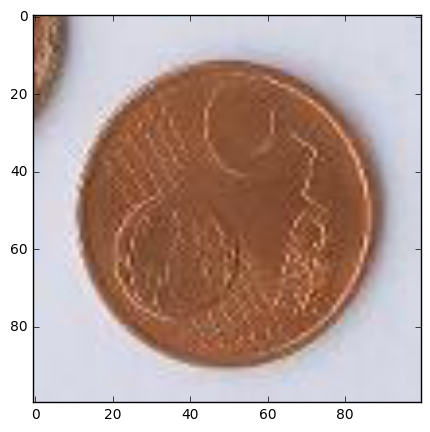

P70210-173616_Candidate_1_Aug_100_180.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


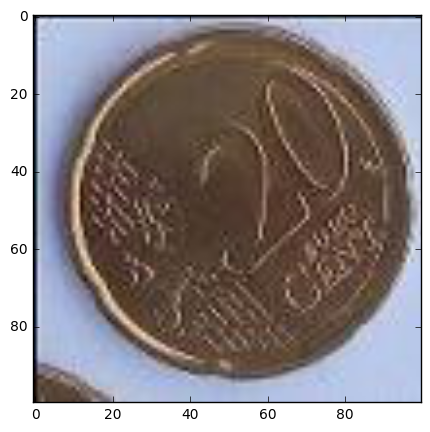

P70210-164314_Candidate_21_Aug_100_0.jpg
This is 1 euro or 2 euro
(100, 100, 3)


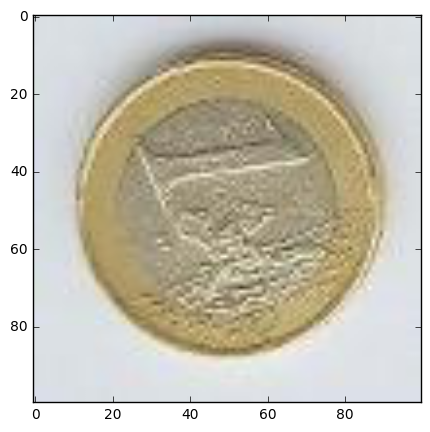

P70210-165837_Candidate_3_Aug_100_180.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


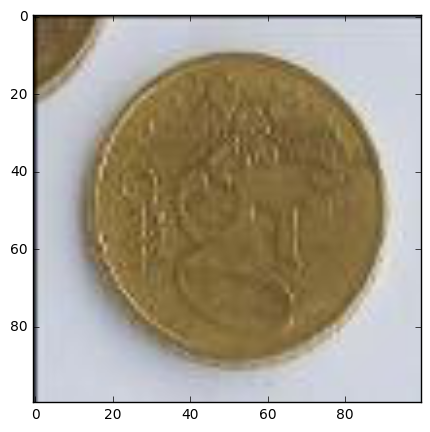

P70210-165415_Candidate_18_Aug_100_0.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


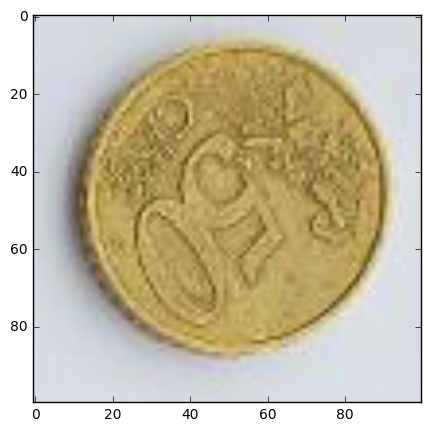

P70210-172107_Candidate_14_Aug_100_270.jpg
This is 5, 2, 1 cent
(100, 100, 3)


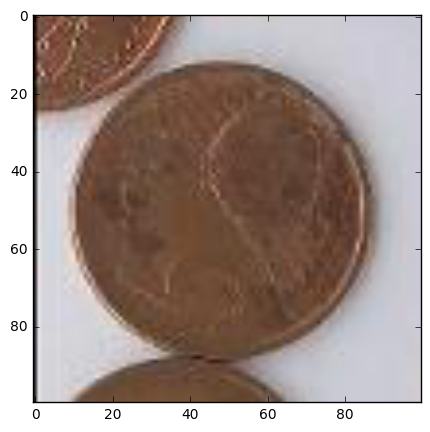

P70210-170336_Candidate_3_Aug_100_90.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


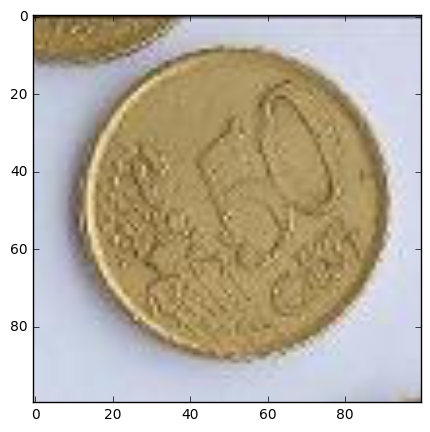

P70210-165637_Candidate_8_Aug_100_180.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


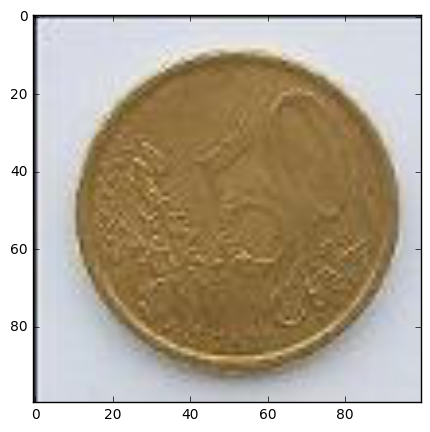

P70210-163946_Candidate_6_Aug_100_270.jpg
This is 1 euro or 2 euro
(100, 100, 3)


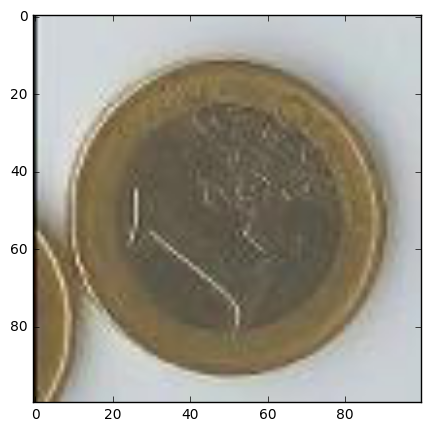

P70210-173526_Candidate_3_Aug_100_180.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


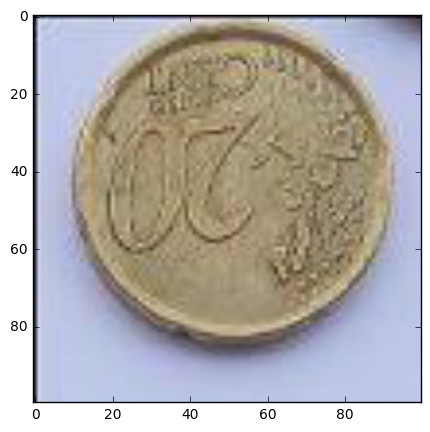

P70210-164244_Candidate_8_Aug_100_180.jpg
This is 1 euro or 2 euro
(100, 100, 3)


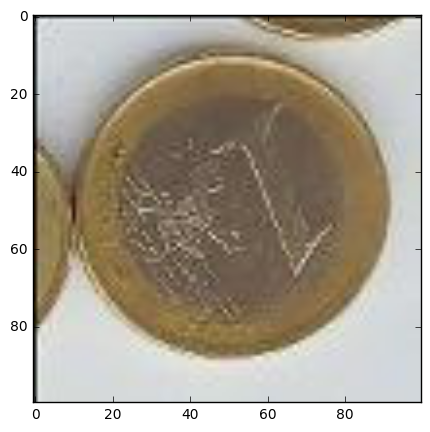

P70210-172921_Candidate_10_Aug_100_0.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


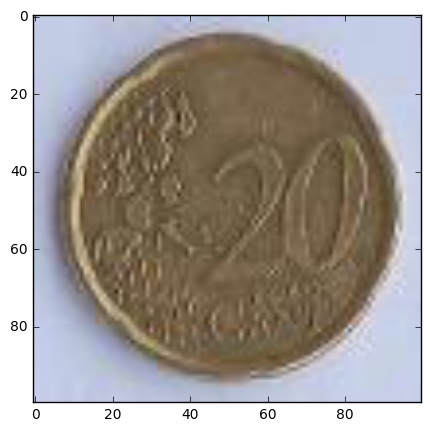

P70210-170326_Candidate_12_Aug_100_270.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


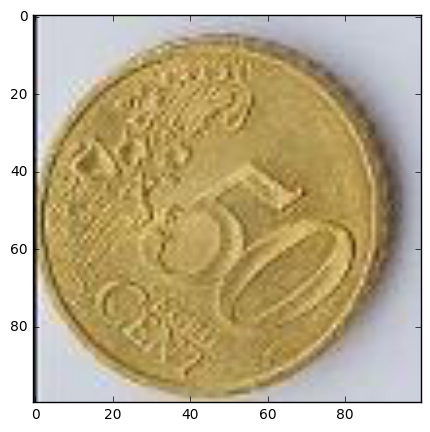

P70210-162912_Candidate_6_Aug_100_270.jpg
This is 1 euro or 2 euro
(100, 100, 3)


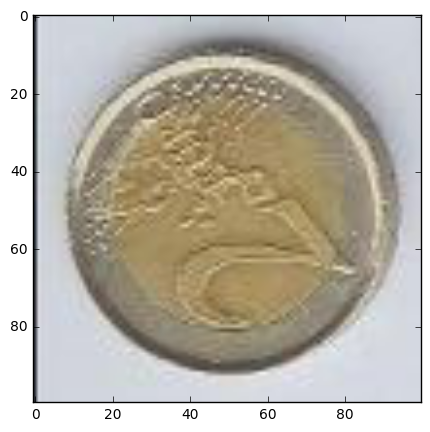

P70210-171334_Candidate_3_Aug_100_0.jpg
This is 5, 2, 1 cent
(100, 100, 3)


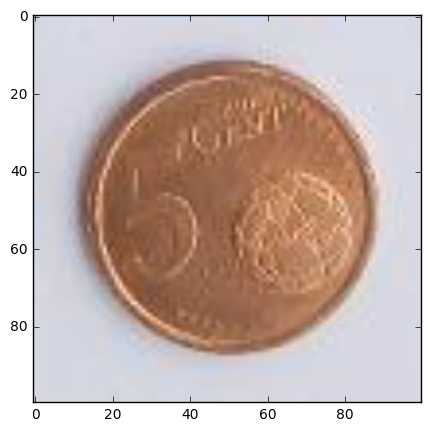

P70210-165637_Candidate_19_Aug_100_180.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


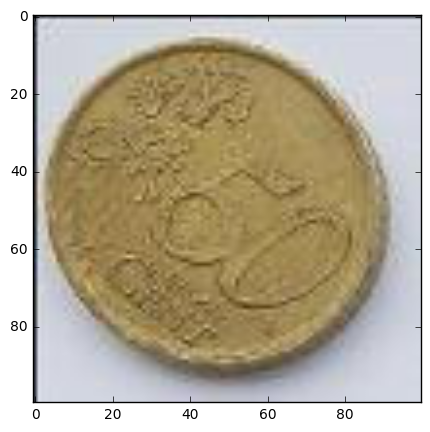

P70210-170955_Candidate_4_Aug_100_0.jpg
This is 5, 2, 1 cent
(100, 100, 3)


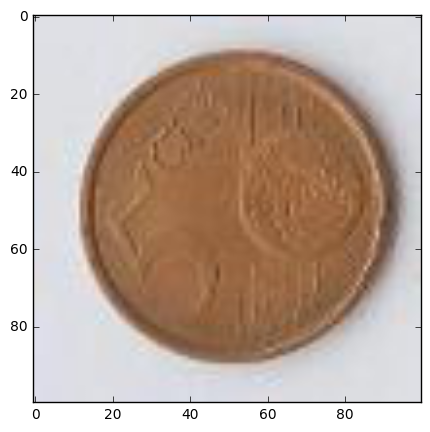

P70210-163923_Candidate_13_Aug_100_90.jpg
This is 1 euro or 2 euro
(100, 100, 3)


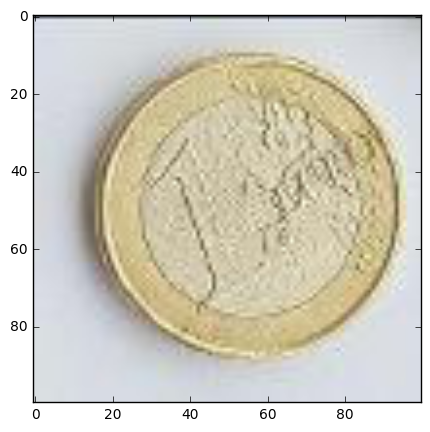

P70210-162423_Candidate_13_Aug_100_180.jpg
This is 1 euro or 2 euro
(100, 100, 3)


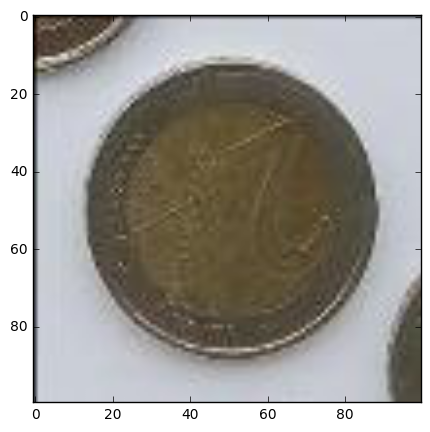

P70210-161923_Candidate_4_Aug_100_180.jpg
This is 1 euro or 2 euro
(100, 100, 3)


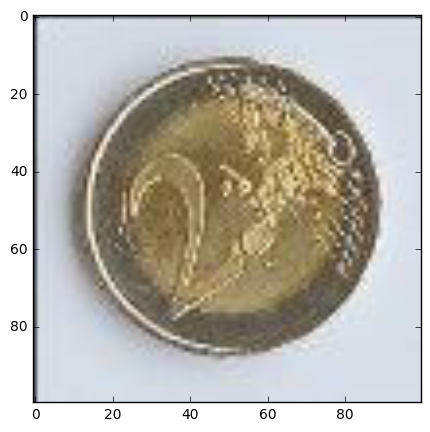

P70210-172018_Candidate_1_Aug_100_0.jpg
This is 5, 2, 1 cent
(100, 100, 3)


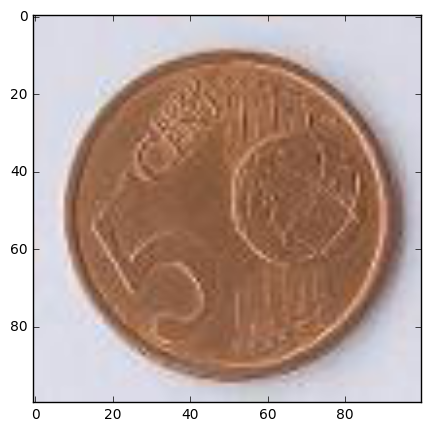

P70210-162316_Candidate_16_Aug_100_90.jpg
This is 1 euro or 2 euro
(100, 100, 3)


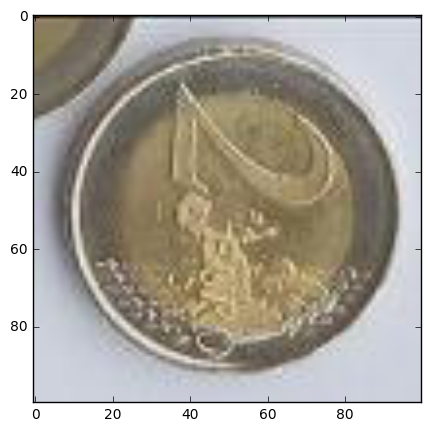

P70210-165657_Candidate_8_Aug_100_270.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


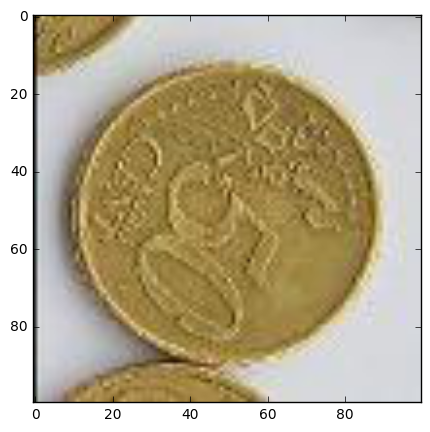

P70210-172941_Candidate_21_Aug_100_90.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


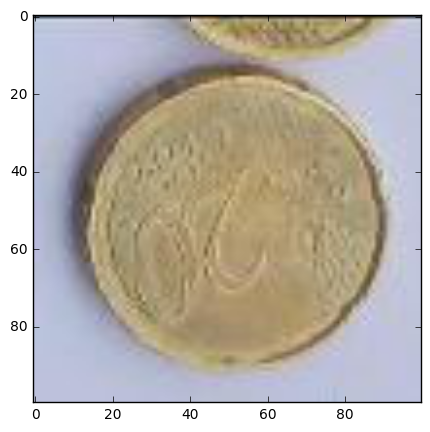

P70210-163443_Candidate_9_Aug_100_270.jpg
This is 1 euro or 2 euro
(100, 100, 3)


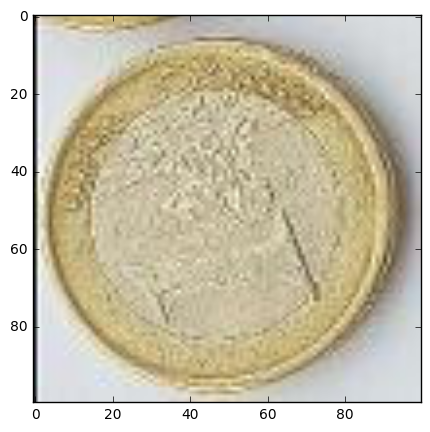

P70210-170616_Candidate_13_Aug_100_180.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


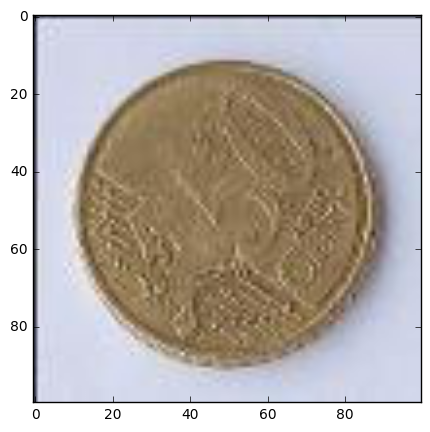

P70210-170336_Candidate_5_Aug_100_180.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


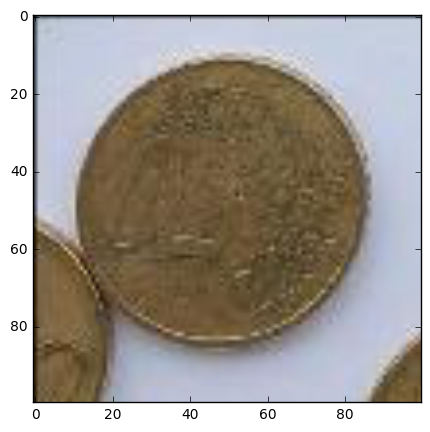

P70210-164225_Candidate_9_Aug_100_90.jpg
This is 1 euro or 2 euro
(100, 100, 3)


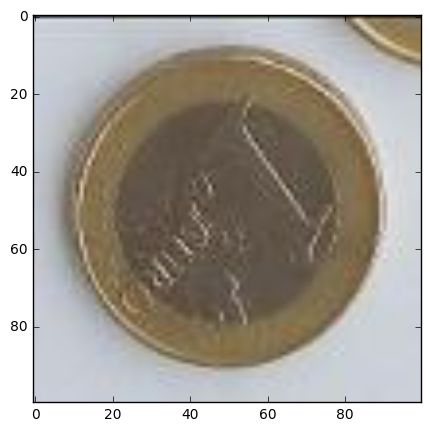

P70210-171834_Candidate_11_Aug_100_270.jpg
This is 5, 2, 1 cent
(100, 100, 3)


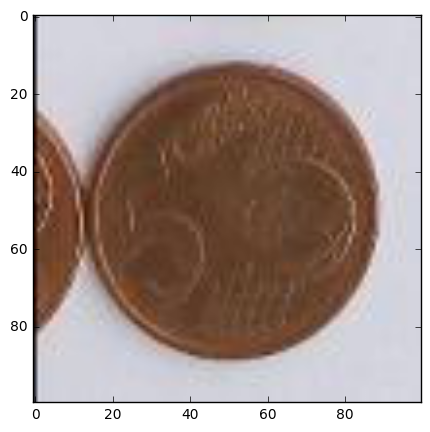

P70210-173309_Candidate_7_Aug_100_270.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


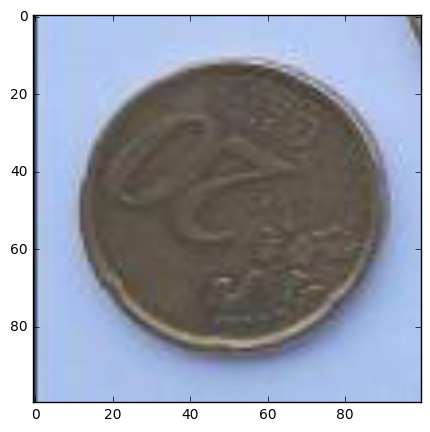

In [3]:
#Print some coins
import matplotlib.pyplot as plt
def printSomeCoints(img, train_images_name, labels, ncoins):
    for i in range(0,ncoins):
        print(train_images_name[i])
        if labels[i] == 0.:
            print "This is 1 euro or 2 euro"
        if labels[i] == 1.:
            print "This is 50, 20 or 10 cent"
        if labels[i] == 2.:
            print "This is 5, 2, 1 cent"
        plt.figure(figsize=(10,5))
        print(train[i].shape)
        plt.imshow(train[i])
        plt.show()
    
    
printSomeCoints(train, train_images_name, labels_train_nocategorical, 30)

<html>
<body>
<h2 style = "color:red"> Building the classificator (work in progress..): </h2>
<p> Use the training dataset to build the classificator using a ConvNN.</p>
</body>
</html>

In [4]:
#Loading keras deep learnig libraries to build the model: https://keras.io/ 
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Convolution2D, MaxPooling2D
from keras.models import Model, model_from_json
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import initializations

In [5]:
#Model hyperparameters
batch_size = 32 # in each iteration, we consider batch_size training examples at once
num_epochs = 4 # we iterate num_epochs times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 62 # ...switching to 64 after the first pooling layer
conv_depth_3 = 128 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with this probability 
drop_prob_2 = 0.5 # dropout in the FC layer with this probability 
hidden_size = 64 # the FC layer will this neurons
data_augmentation = False # Whether to use or not data augmentation

ROWS = 100
COLS = 100
CHANNELS = 3

NN = False
ConvNN = True
if ConvNN == True:
    #Architecture
    inp = Input(shape=(ROWS, COLS, CHANNELS)) # N.B. depth goes first in Keras!
    conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size, border_mode='same', activation='relu')(inp)
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_1)
    conv_2 = Convolution2D(conv_depth_2, kernel_size, kernel_size, border_mode='same', activation='relu')(pool_1)
    pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    conv_3 = Convolution2D(conv_depth_3, kernel_size, kernel_size, border_mode='same', activation='relu')(pool_2)
                       

    flat = Flatten()(conv_3)
    hidden = Dense(hidden_size, activation='relu')(flat)
    out = Dense(nb_classes, activation='sigmoid')(hidden)
    model = Model(input=inp, output=out) # To define a model, just specify its input and output layers

if NN == True:
    #Architecture
    inp = Input(shape=(ROWS, COLS, CHANNELS)) # N.B. depth goes first in Keras!                  
    flat = Flatten()(inp)
    hidden = Dense(hidden_size, activation='relu')(flat)
    out = Dense(nb_classes, activation='sigmoid')(hidden)
    model = Model(input=inp, output=out) # To define a model, just specify its input and output layers

    
#print the summary of the architecture
model.summary()

#Visulize the model if desired
#from keras.utils.visualize_util import plot
#plot(model, to_file='Example_of_CNN_CatsVsDogs.pdf')

# reduce the learning rate by factor of 0.5 if the validation loss does not get lower in 7 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, min_lr=0.0000001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')


# Let's train the model using SGD
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])

# Let's train the SGD model WITHOUT using data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(train, labels_train, batch_size=batch_size, nb_epoch=num_epochs, validation_data=(validation, labels_validation), shuffle=True, callbacks=[reduce_lr])
                       
                       

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 100, 100, 3)   0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 100, 100, 32)  896         input_1[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 50, 50, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 50, 50, 62)    17918       maxpooling2d_1[0][0]             
___________________________________________________________________________________________

# Learning curves (check the performance)

['acc', 'loss', 'val_acc', 'val_loss', 'lr']


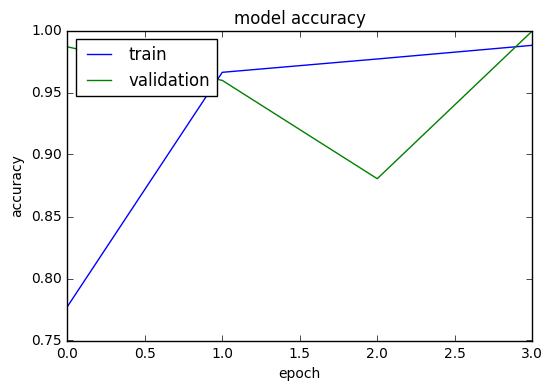

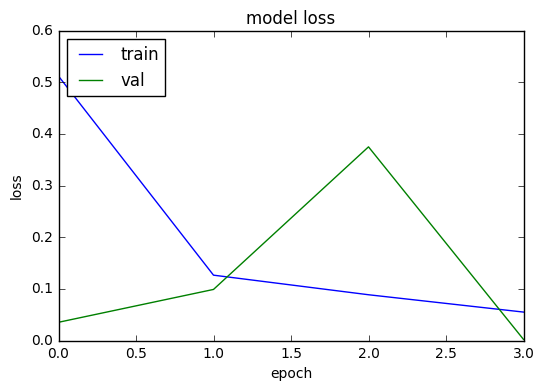

In [6]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig('Accuracy_Example_Coin_Classifier.pdf')
plt.close()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('Loss_Example_Coin_Classifier.pdf')
plt.close()

# Save 

In [7]:
def SaveModel(model, modelName):
    # serialize model to JSON
    model_json = model.to_json()
    with open(modelName+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(modelName+".h5")
    print("Saved model "+modelName+" to disk")  
    return 0

SaveModel(model, "Model_Example_Coin_Classifier")

Saved model Model_Example_Coin_Classifier to disk


0

# Load and Test model

Loaded model Model_Example_Coin_Classifier from disk 

PREDICTIONS 

 0.06750190 of 1,2 euro 

 0.00000000 of 50,20,10 cent 

 0.00000001 of 5,2,1 



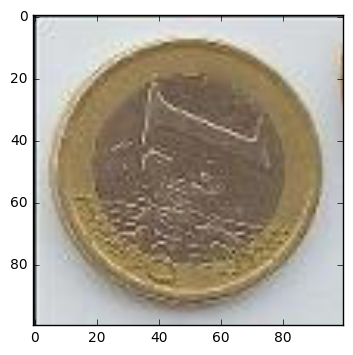

 0.00000000 of 1,2 euro 

 0.99903917 of 50,20,10 cent 

 0.00000000 of 5,2,1 



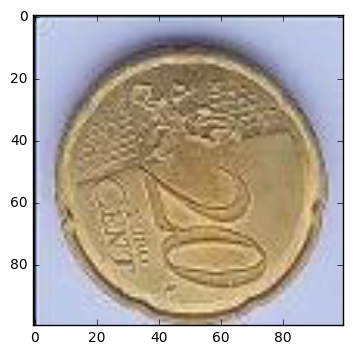

 0.34610340 of 1,2 euro 

 0.00000000 of 50,20,10 cent 

 0.00000000 of 5,2,1 



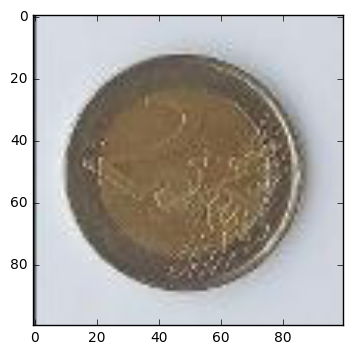

 0.99947459 of 1,2 euro 

 0.00000000 of 50,20,10 cent 

 0.00000000 of 5,2,1 



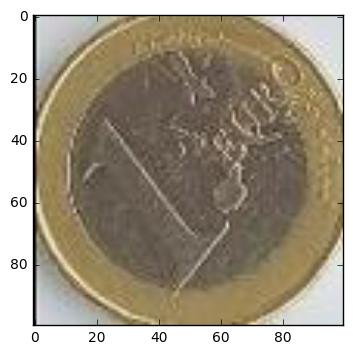

 0.00000005 of 1,2 euro 

 0.66416925 of 50,20,10 cent 

 0.00000138 of 5,2,1 



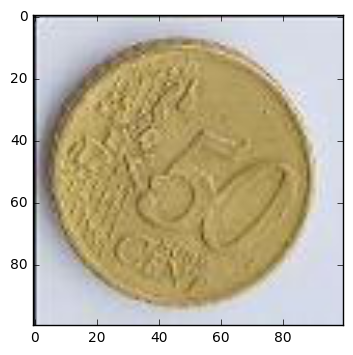

 0.00000003 of 1,2 euro 

 0.92628610 of 50,20,10 cent 

 0.00000016 of 5,2,1 



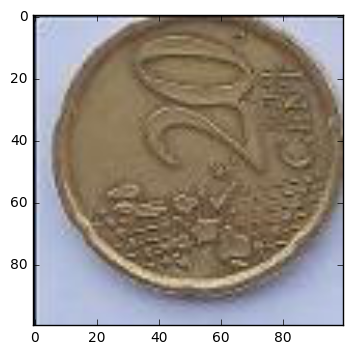

 0.00000001 of 1,2 euro 

 0.00000010 of 50,20,10 cent 

 0.99999905 of 5,2,1 



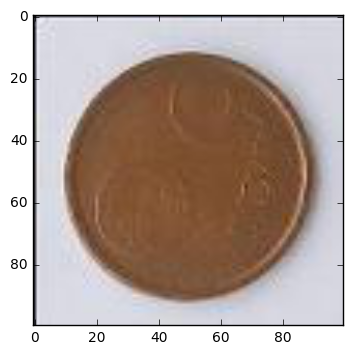

 0.00000117 of 1,2 euro 

 0.00000866 of 50,20,10 cent 

 0.99987769 of 5,2,1 



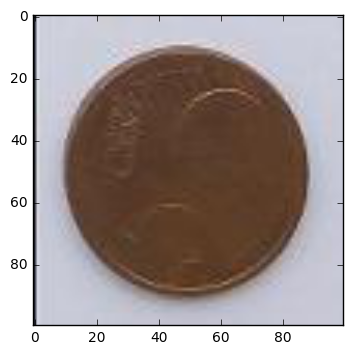

 0.68790412 of 1,2 euro 

 0.00000001 of 50,20,10 cent 

 0.00000007 of 5,2,1 



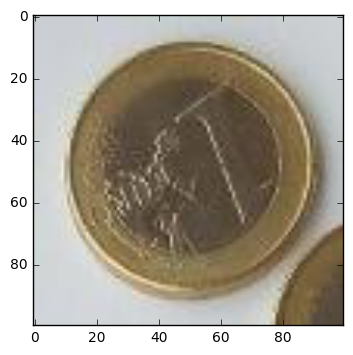

 0.00000138 of 1,2 euro 

 0.00000873 of 50,20,10 cent 

 0.99961972 of 5,2,1 



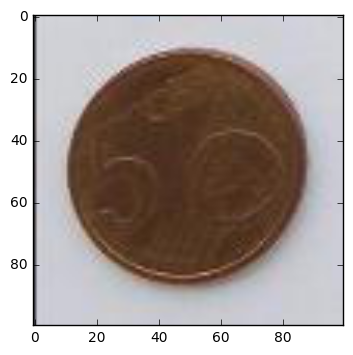

In [8]:
def LoadModel(modelName):
    # load json and create model
    json_file = open(modelName+".json", "r")
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(modelName+".h5")
    print("Loaded model "+modelName+" from disk \n")
    return loaded_model


#Useful to test.
LoadAndTest = True
nTest = 10
if LoadAndTest == True:
    loaded_model=LoadModel("Model_Example_Coin_Classifier")  
    # evaluate loaded model on test data
    loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
    
    #score_train = loaded_model.evaluate(train, labels_train, verbose=0)
    #score_validation = loaded_model.evaluate(validation, labels_validation, verbose=0)
    #print "Training %s: %.2f%%" % (loaded_model.metrics_names[1], score_train[1]*100)
    #print "Validation %s: %.2f%%" % (loaded_model.metrics_names[1], score_validation[1]*100)    
    
    print("PREDICTIONS \n")
    reduced_test = test[:nTest]
    predictedLabel = loaded_model.predict(reduced_test)

    for i in range(0,nTest):
        print(" %.8f of 1,2 euro \n" % predictedLabel[i,0])
        print(" %.8f of 50,20,10 cent \n" % predictedLabel[i,1])
        print(" %.8f of 5,2,1 \n" % predictedLabel[i,2])

        plt.imshow(reduced_test[i])
        plt.show()
    
        
    